<a href="https://colab.research.google.com/github/revysatyagunawan/Tugas_PCD_RevySatyaGunawan_24_538296_PA_22835/blob/main/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 01 - Pengolahan Citra Digital
### Nama: Revy Satya Gunawan
### NIM: 24/538296/PA/22835

---

Kita akan melakukan image inhancement untuk citra yang terlalu gelap, kontras rendah, terlalu terang, blurred, dan noisy.

---

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

---
##Citra Gelap
Untuk citra gelap, ada dua metode yang cocok untuk ehancement, yaitu logarithmic transformation dan gamma correction dengan $\gamma<1$.

1. Citra Asli:


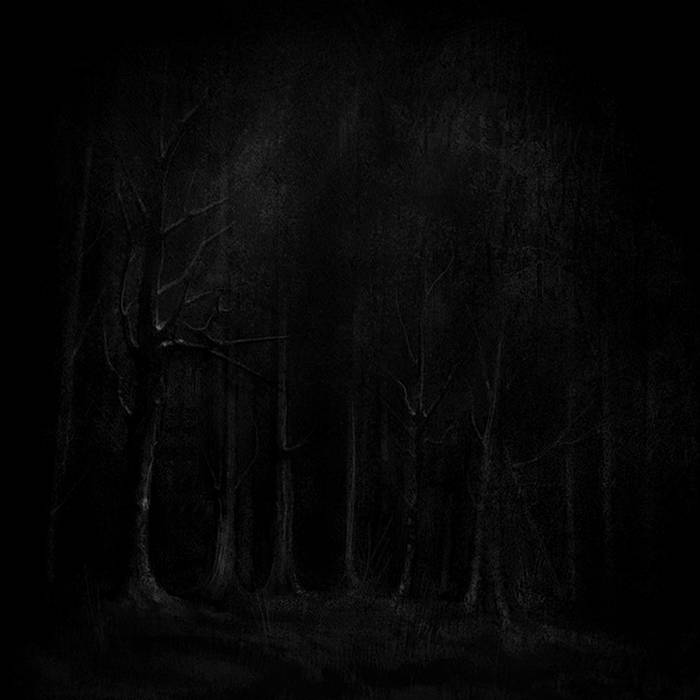


2. Hasil Log Transform:


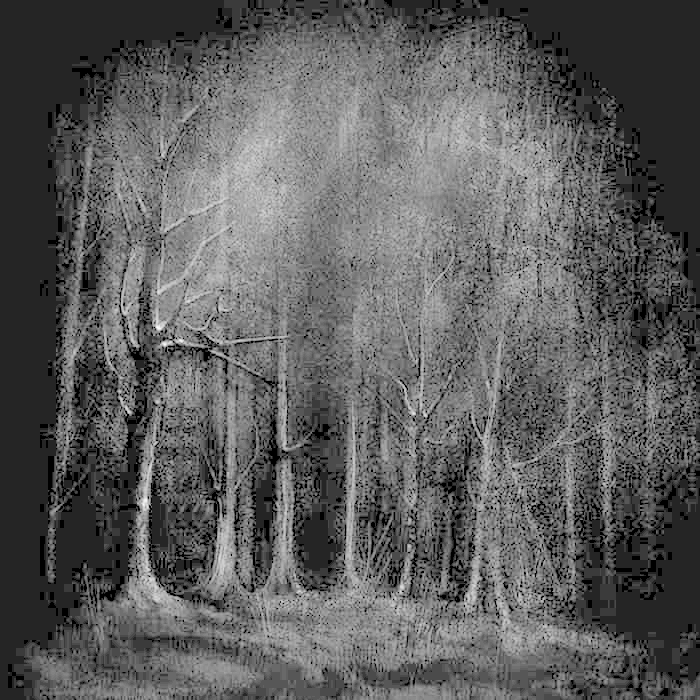


3. Hasil Gamma Correction (γ=0.5):


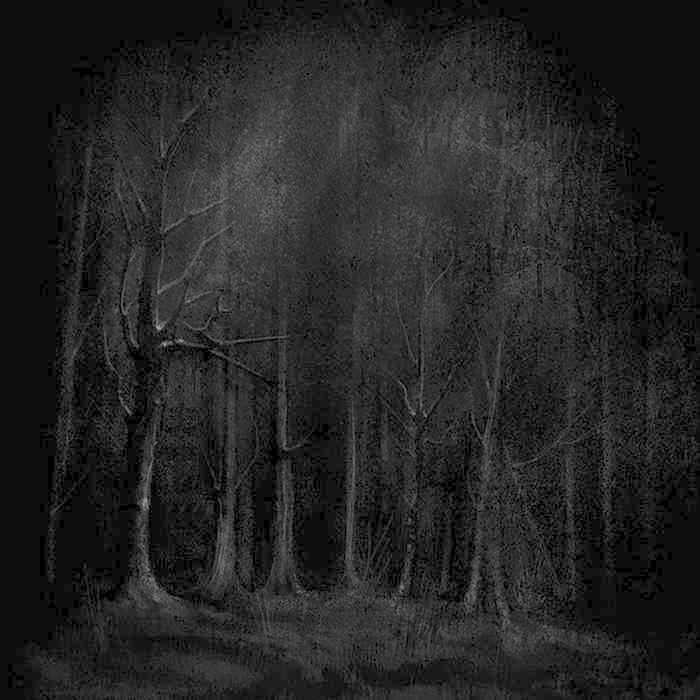

In [2]:
!wget -q https://f4.bcbits.com/img/a1720894507_16.jpg -O dark.jpg
image = cv2.imread('dark.jpg', cv2.IMREAD_GRAYSCALE)

c = 255 / np.log(1 + np.max(image))
log_result = np.uint8(c * (np.log(image + 1)))

gamma = 0.5
lookUpTable = np.array([np.clip(((i / 255.0) ** gamma) * 255.0, 0, 255) for i in np.arange(0, 256)]).astype("uint8")
gamma_result = cv2.LUT(image, lookUpTable)

print("1. Citra Asli:")
cv2_imshow(image)
print("\n2. Hasil Log Transform:")
cv2_imshow(log_result)
print("\n3. Hasil Gamma Correction (γ=0.5):")
cv2_imshow(gamma_result)

###Analisis Enhancement pada Citra Gelap
Kita bisa lihat bahwa logarithmic transform dan gamma correction masing-masing memberikan hasil yang terang. Namun, hasil logarithmic transform terlalu terang, sedangkan hasil gamma correction seimbang sehingga kini ita bisa melihat citranya dengan baik.

---

###Citra Kontras Rendah
Untuk meng-enhance citra low-contrast, metode yang relevan digunakan adalah histogram equalization dan contrast stretching.

1. Citra Asli:


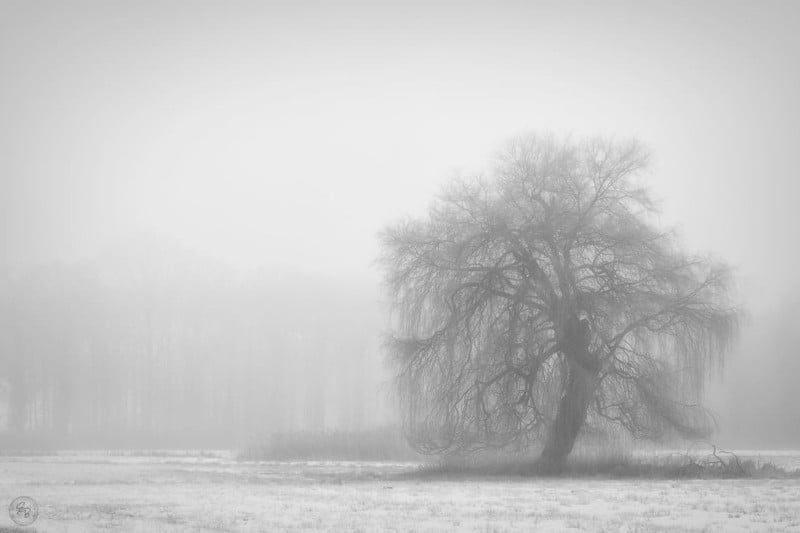

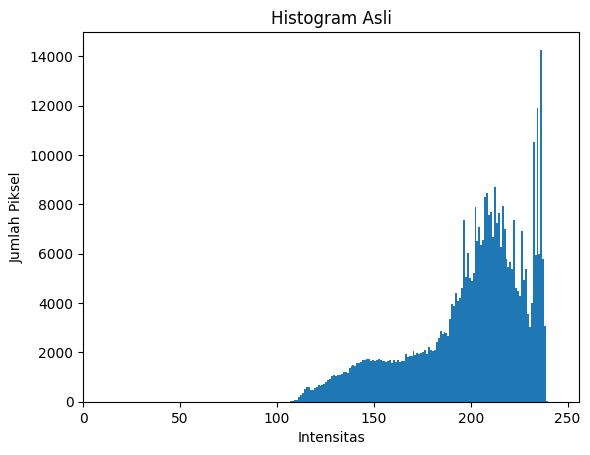


2. Hasil Contrast Stretching:


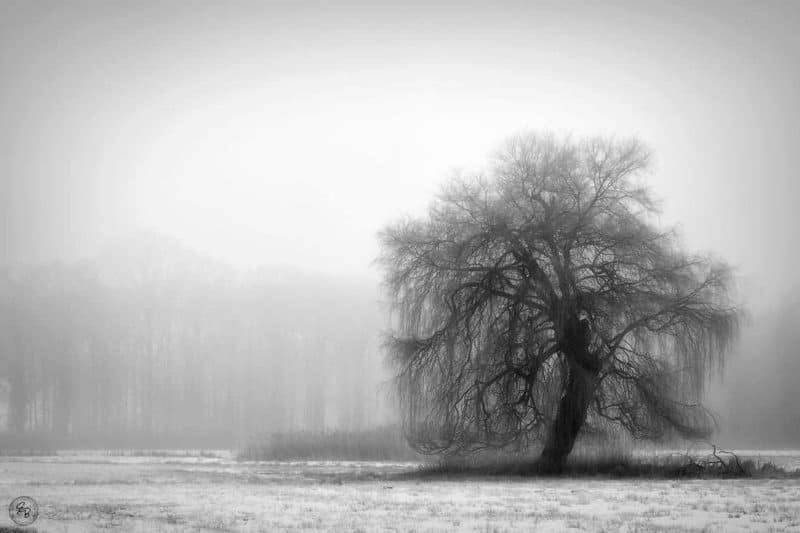

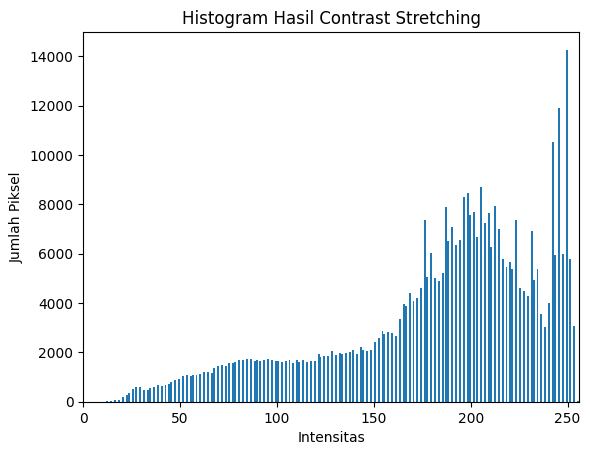


3. Hasil Histogram Equalization:


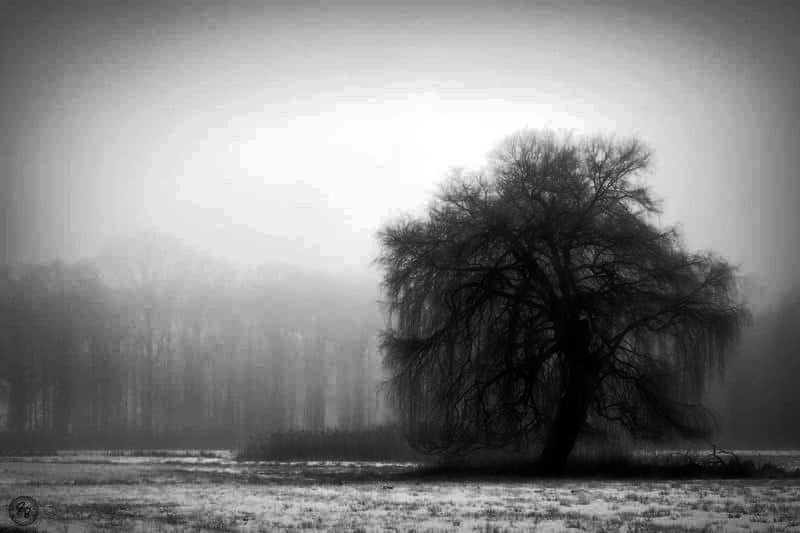

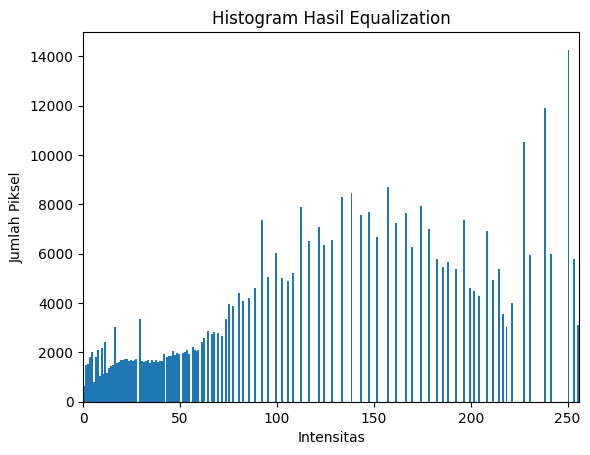

In [3]:
!wget -q https://petapixel.com/assets/uploads/2019/04/p2219651326-5-800x533.jpg -O lowcontrast.jpg
image1 = cv2.imread('lowcontrast.jpg', cv2.IMREAD_GRAYSCALE)

min_val = np.min(image1)
max_val = np.max(image1)
contrast_stretched_result = np.uint8(((image1 - min_val) * (255.0 / (max_val - min_val))))

hist_eq_result = cv2.equalizeHist(image1)

def plot_histogram(image1, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Intensitas")
    plt.ylabel("Jumlah Piksel")
    plt.hist(image1.ravel(), bins=256, range=[0, 256])
    plt.xlim([0, 256])
    plt.show()

print("1. Citra Asli:")
cv2_imshow(image1)
plot_histogram(image1, "Histogram Asli")
print("\n2. Hasil Contrast Stretching:")
cv2_imshow(contrast_stretched_result)
plot_histogram(contrast_stretched_result, "Histogram Hasil Contrast Stretching")
print("\n3. Hasil Histogram Equalization:")
cv2_imshow(hist_eq_result)
plot_histogram(hist_eq_result, "Histogram Hasil Equalization")

###Analisis Enhancement pada Citra Kontras Rendah
Contrast stretching menghasilkan citra dengan sifat yang cukup kontras dan sudah seimbang jika dibandingkan dengan citra asli. Di sisi lain, histogram equalization memberikan citra yang sangat kontras, tetapi membuat citranya sedikit lebih buram. Hal ini terjadi karena metode ini bersifat global sehingga jika distribusi nilai asli sangat padat, hasilnya menjadi kurang baik.

---

###Citra Terlalu Terang
Untuk mengatasi citra yang terlalu terang, kita bisa gunakan gamma correction dengan $\gamma > 1$

1. Citra Asli:


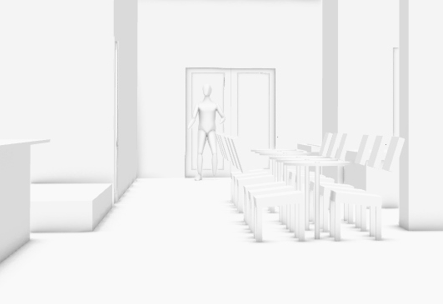


2. Hasil Gamma Correction (γ=2.0):


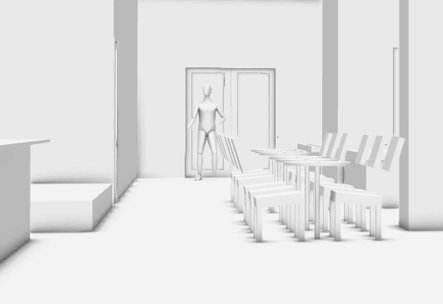

In [4]:
!wget -q https://global.discourse-cdn.com/mcneel/uploads/default/original/4X/4/f/3/4f3a0cfcc876de65a10a54d9ccdcaedb63430660.png -O toobright.png
image2 = cv2.imread('toobright.png', cv2.IMREAD_GRAYSCALE)

gamma = 2.0
lookUpTable = np.array([np.clip(((i / 255.0) ** gamma) * 255.0, 0, 255) for i in np.arange(0, 256)]).astype("uint8")
gamma_result = cv2.LUT(image2, lookUpTable)

print("1. Citra Asli:")
cv2_imshow(image2)
print("\n2. Hasil Gamma Correction (γ=2.0):")
cv2_imshow(gamma_result)

###Analisis Enhancement pada Citra Terlalu Terang
Bisa dilihat bahwa gamma correction ini memberikan hasil yang sangat baik dengan menekan pixel-pixel yang terlalu terang. Sebelumnya, citra memiliki detail-detail yang hilang karena terlalu terang. Hal itu diperbaiki dengan gamma correction.

---

###Citra Kabur (Blurred)
Untuk kasus citra yang terlihat kabur, ada dua metode relevan yang bisa kita gunakan: sharpening dengan Laplacian subtraction dan sharpening dengan convolution kernel.

1. Citra Asli:


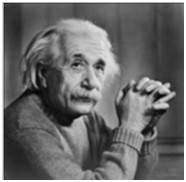


2. Hasil Sharpening (Laplacian Subtraction):


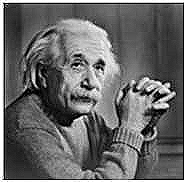


3. Hasil Sharpening (Convolution Kernel):


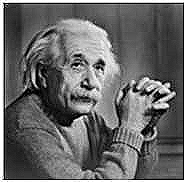

In [5]:
!wget -q https://www.tutorialspoint.com/dip/images/blurring3.jpg -O blurred.jpg
image3 = cv2.imread('blurred.jpg', cv2.IMREAD_GRAYSCALE)

laplacian = cv2.Laplacian(image3, cv2.CV_64F)
laplacian_sub_result = np.uint8(np.clip(image3 - laplacian, 0, 255))

sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpening_conv_result = cv2.filter2D(image3, -1, sharpening_kernel)

print("1. Citra Asli:")
cv2_imshow(image3)
print("\n2. Hasil Sharpening (Laplacian Subtraction):")
cv2_imshow(laplacian_sub_result)
print("\n3. Hasil Sharpening (Convolution Kernel):")
cv2_imshow(sharpening_conv_result)

###Analisis Enhancement pada Citra Kabur
Bisa kita lihat bahwa Laplacian subtraction dan convolution kernel masing-masing memberikan hasil citra yang sudah tidak kabur lagi.

---

###Citra Noisy
Untuk mengatasi citra yang ber-noise, kita bisa menggunakan median filer.

1. Citra Asli:


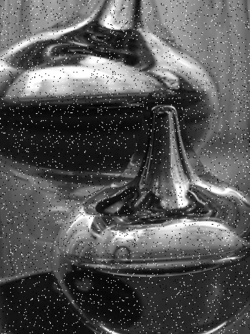


2. Hasil Median Filter:


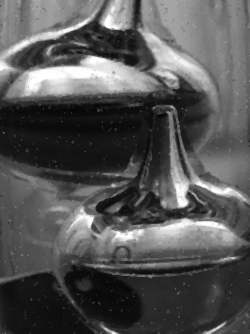

In [6]:
!wget -q https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Noise_salt_and_pepper.png/250px-Noise_salt_and_pepper.png -O noisy_image.png
image4 = cv2.imread('noisy_image.png', cv2.IMREAD_GRAYSCALE)

median_result = cv2.medianBlur(image4, 3) # Ukuran kernel 3x3

print("1. Citra Asli:")
cv2_imshow(image4)
print("\n2. Hasil Median Filter:")
cv2_imshow(median_result)

###Analisis Enhancement Pada Citra Noisy
Pada kasus tersebut, median filtering bekerja dengan sangat baik. Hampir setiap noise berupa bintik-bintik putih hilang.

###Kesimpulan dan Catatan
Berdasarkan beberapa percobaan yang sudah dilakukan. Metode-metode dasar dalam image enhancement sudah bekerja dengan baik. Namun, yang perlu dicatat adalah tentu ada berbagai metode lain yang bisa untuk kasus-kasus serupa yang mungkin memberikan hasil lebih baik. Selain itu, mungkin saja metode-metode yang sudah diterapkan di atas memberikan hasil yang tidak begitu baik jika kita gunakan citra lain dengan karakteristik khusus yang berbeda.